In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy.random as np
import sys
import matplotlib

%matplotlib inline

In [2]:
print('Python version '+sys.version)
print('Pandas version '+pd.__version__)
print('Matplotlib verison '+matplotlib.__version__)

Python version 3.5.2 |Anaconda 4.2.0 (64-bit)| (default, Jul  5 2016, 11:41:13) [MSC v.1900 64 bit (AMD64)]
Pandas version 0.18.1
Matplotlib verison 1.5.3


In [3]:
#set seed
np.seed(111)

#function to generate test data
def CreateDataSet(Number=1):
    Output=[]
    
    for i in range(Number):
        
        #Create a weekly(mondays) data range
        rng=pd.date_range(start='1/1/2009',end='12/31/2012',freq='W-MON')
        
        #Create random data
        data=np.randint(low=25,high=1000,size=len(rng))
        
        #Status pool
        status=[1,2,3]
        
        #Make a random list of statuses
        random_status=[status[np.randint(low=0,high=len(status))] for i in range(len(rng))]

        #State pool
        states=['GA','FL','fl','NY','NJ','TX']
        
            
        #Make a random list of states
        random_states=[states[np.randint(low=0,high=len(states))] for i in range(len(rng))]
        
        Output.extend(zip(random_states,random_status,data,rng))
        
    return Output        

In [4]:
dataset=CreateDataSet(4)
df=pd.DataFrame(data=dataset,columns=['State','Status','CustomerCount','StatusDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 4 columns):
State            836 non-null object
Status           836 non-null int64
CustomerCount    836 non-null int64
StatusDate       836 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 26.2+ KB


In [5]:
df.head()

,State,Status,CustomerCount,StatusDate
0,GA,1,877,2009-01-05
1,FL,1,901,2009-01-12
2,fl,3,749,2009-01-19
3,FL,3,111,2009-01-26
4,GA,1,300,2009-02-02


In [6]:
#Save results to excel
df.to_excel('Lesson3.xlsx',index=False)
print('Done')

Done


In [7]:
pd.read_excel?

In [8]:
#Location of file
Location=r'Lesson3.xlsx'

#Parse a specific sheet
df=pd.read_excel(Location,0,index_col='StatusDate')
df.dtypes

State            object
Status            int64
CustomerCount     int64
dtype: object

In [9]:
df.index

DatetimeIndex(['2009-01-05', '2009-01-12', '2009-01-19', '2009-01-26',
               '2009-02-02', '2009-02-09', '2009-02-16', '2009-02-23',
               '2009-03-02', '2009-03-09',
               ...
               '2012-10-29', '2012-11-05', '2012-11-12', '2012-11-19',
               '2012-11-26', '2012-12-03', '2012-12-10', '2012-12-17',
               '2012-12-24', '2012-12-31'],
              dtype='datetime64[ns]', name='StatusDate', length=836, freq=None)

In [10]:
df.head()

,State,Status,CustomerCount
StatusDate,,,
2009-01-05,GA,1,877
2009-01-12,FL,1,901
2009-01-19,fl,3,749
2009-01-26,FL,3,111
2009-02-02,GA,1,300


In [11]:
df['State'].unique()

array(['GA', 'FL', 'fl', 'TX', 'NY', 'NJ'], dtype=object)

In [12]:
#Clean State Column,convert to upper case
df['State']=df.State.apply(lambda x:x.upper())

In [13]:
df['State'].unique()

array(['GA', 'FL', 'TX', 'NY', 'NJ'], dtype=object)

In [14]:
#Only grab where State==1
mask=df['Status']==1
df=df[mask]

In [15]:
#Convert NJ to NY
mask=df.State=='NJ'
df['State'][mask]='NY'

In [16]:
df['State'].unique()

array(['GA', 'FL', 'NY', 'TX'], dtype=object)

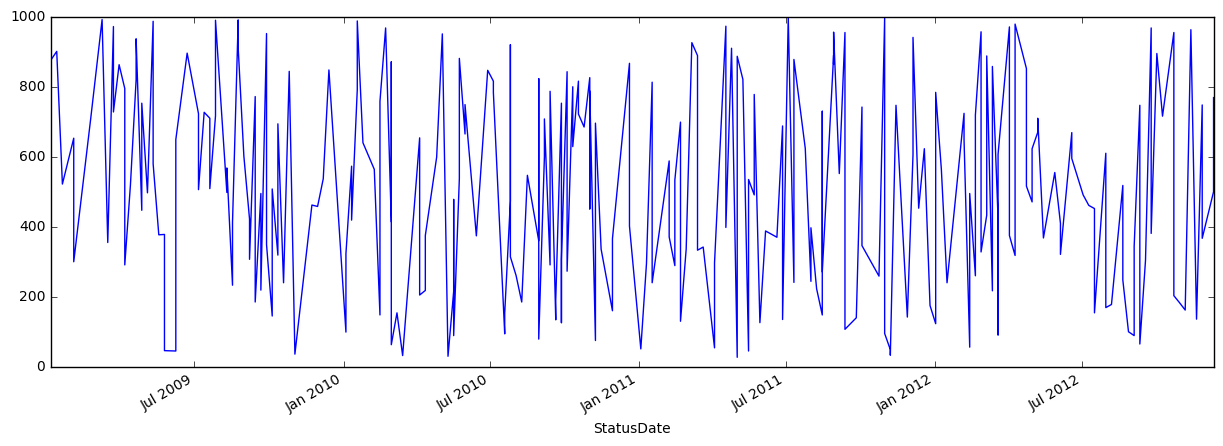

In [17]:
df['CustomerCount'].plot(figsize=(15,5))

In [18]:
sortdf=df[df['State']=='NY'].sort_index(axis=0)
sortdf.head(10)

,State,Status,CustomerCount
StatusDate,,,
2009-01-19,NY,1,522
2009-02-23,NY,1,710
2009-03-09,NY,1,992
2009-03-16,NY,1,355
2009-03-23,NY,1,728
2009-03-30,NY,1,863
2009-04-13,NY,1,520
2009-04-20,NY,1,820
2009-04-20,NY,1,937


In [19]:
#Group by State and StatusDate
Daily=df.reset_index().groupby(['State','StatusDate']).sum()
Daily.head()

Status  CustomerCount
State StatusDate                       
FL    2009-01-12       1            901
      2009-02-02       1            653
      2009-03-23       1            752
      2009-04-06       2           1086
      2009-06-08       1            649

In [20]:
del Daily['Status']
Daily.head()

CustomerCount
State StatusDate               
FL    2009-01-12            901
      2009-02-02            653
      2009-03-23            752
      2009-04-06           1086
      2009-06-08            649

In [21]:
#What is the index of the dataframe
Daily.index

MultiIndex(levels=[['FL', 'GA', 'NY', 'TX'], [2009-01-05 00:00:00, 2009-01-12 00:00:00, 2009-01-19 00:00:00, 2009-02-02 00:00:00, 2009-02-23 00:00:00, 2009-03-09 00:00:00, 2009-03-16 00:00:00, 2009-03-23 00:00:00, 2009-03-30 00:00:00, 2009-04-06 00:00:00, 2009-04-13 00:00:00, 2009-04-20 00:00:00, 2009-04-27 00:00:00, 2009-05-04 00:00:00, 2009-05-11 00:00:00, 2009-05-18 00:00:00, 2009-05-25 00:00:00, 2009-06-08 00:00:00, 2009-06-22 00:00:00, 2009-07-06 00:00:00, 2009-07-13 00:00:00, 2009-07-20 00:00:00, 2009-07-27 00:00:00, 2009-08-10 00:00:00, 2009-08-17 00:00:00, 2009-08-24 00:00:00, 2009-08-31 00:00:00, 2009-09-07 00:00:00, 2009-09-14 00:00:00, 2009-09-21 00:00:00, 2009-09-28 00:00:00, 2009-10-05 00:00:00, 2009-10-12 00:00:00, 2009-10-19 00:00:00, 2009-10-26 00:00:00, 2009-11-02 00:00:00, 2009-11-23 00:00:00, 2009-11-30 00:00:00, 2009-12-07 00:00:00, 2009-12-14 00:00:00, 2010-01-04 00:00:00, 2010-01-11 00:00:00, 2010-01-18 00:00:00, 2010-01-25 00:00:00, 2010-02-08 00:00:00, 2010-02-1

In [22]:
#Select the State index
Daily.index.levels[0]

Index(['FL', 'GA', 'NY', 'TX'], dtype='object', name='State')

In [23]:
#Select the StatusDate index
Daily.index.levels[1]

DatetimeIndex(['2009-01-05', '2009-01-12', '2009-01-19', '2009-02-02',
               '2009-02-23', '2009-03-09', '2009-03-16', '2009-03-23',
               '2009-03-30', '2009-04-06',
               ...
               '2012-09-24', '2012-10-01', '2012-10-08', '2012-10-22',
               '2012-10-29', '2012-11-05', '2012-11-12', '2012-11-19',
               '2012-11-26', '2012-12-10'],
              dtype='datetime64[ns]', name='StatusDate', length=161, freq=None)

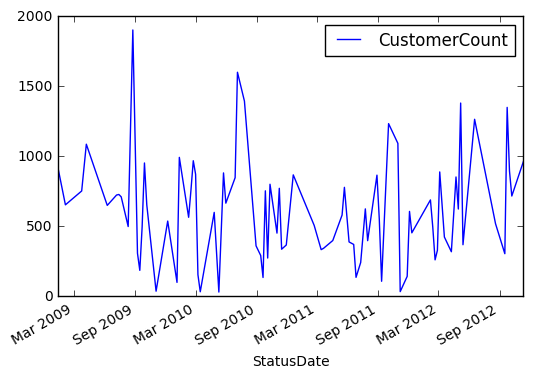

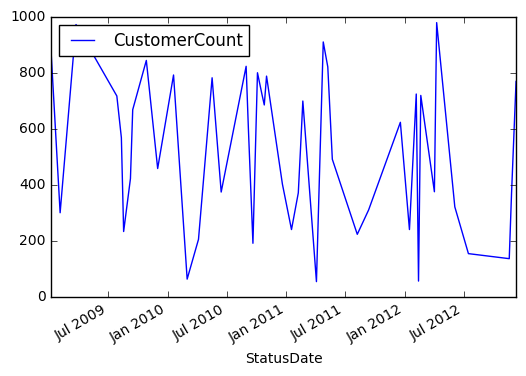

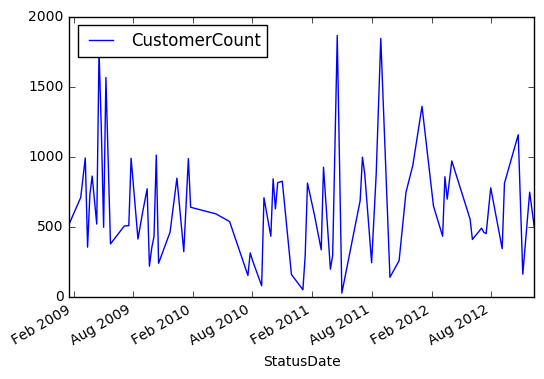

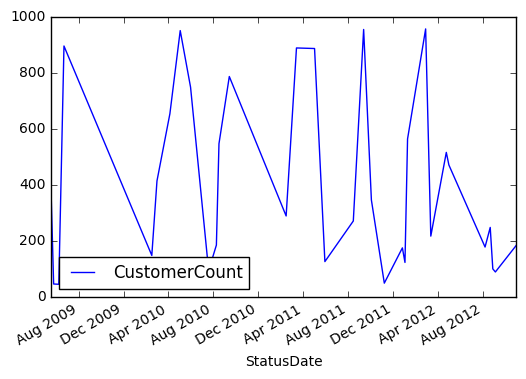

In [24]:
Daily.loc['FL'].plot()
Daily.loc['GA'].plot()
Daily.loc['NY'].plot()
Daily.loc['TX'].plot()

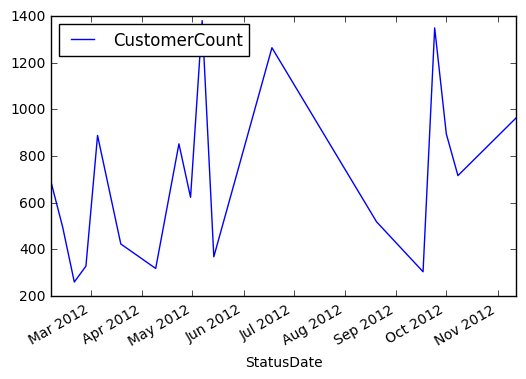

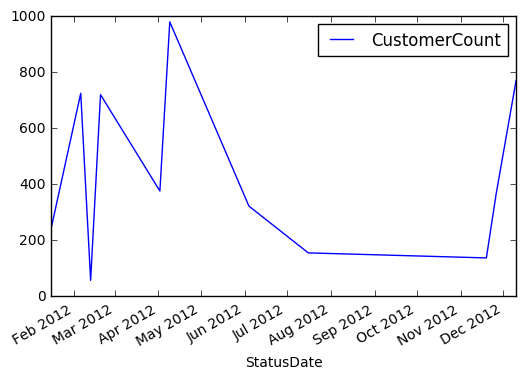

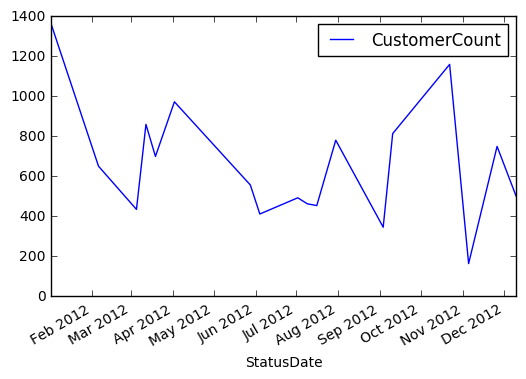

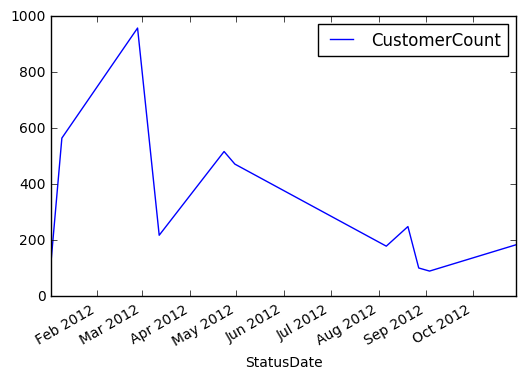

In [25]:
Daily.loc['FL']['2012':].plot()
Daily.loc['GA']['2012':].plot()
Daily.loc['NY']['2012':].plot()
Daily.loc['TX']['2012':].plot()


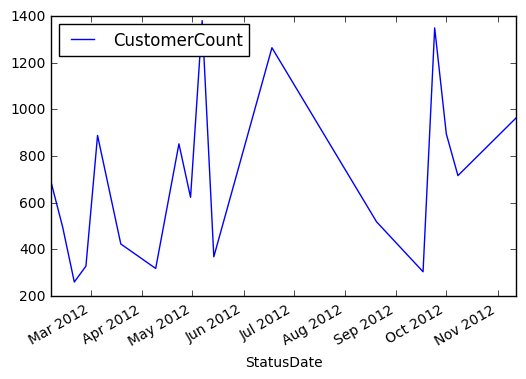

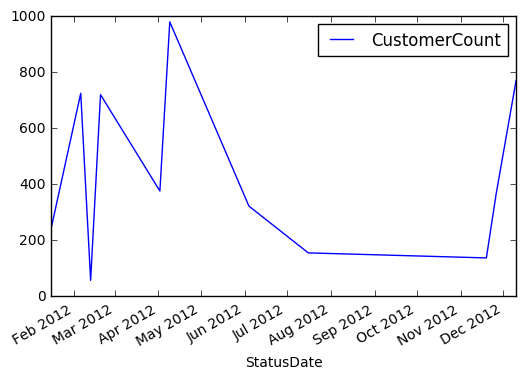

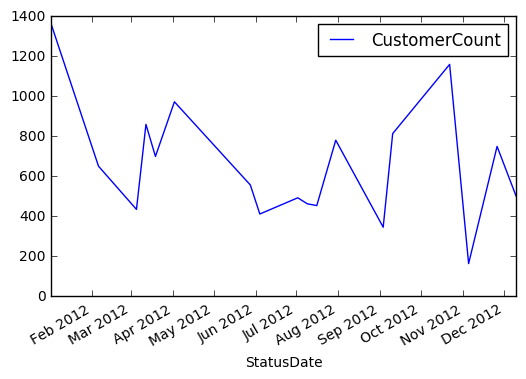

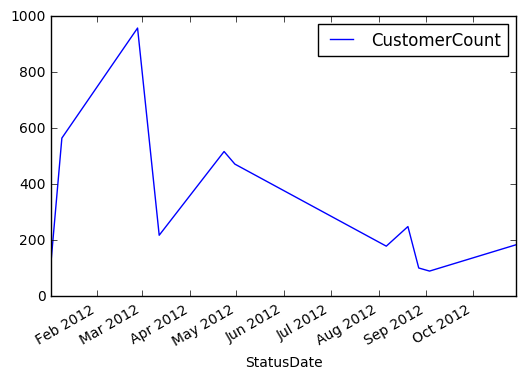

In [26]:
Daily.loc['FL']['2012'].plot()
Daily.loc['GA']['2012'].plot()
Daily.loc['NY']['2012'].plot()
Daily.loc['TX']['2012'].plot()

In [ ]:
#Calculate Outliers
StateYearMonth = Daily.groupby([Daily.index.get_level_values(0), Daily.index.get_level_values(1).year, Daily.index.get_level_values(1).month])
Daily['Lower']=StateYearMonth['CustomerCount'].transform